# Final Project (DS102 and DS104)
## Travel Insurance

### Problem Statement: <br><br> The project objective is to understand which risk profile are more likely to have high claim rate of travel insurance and determine the price for the particular plans to be adjusted based on the age, duration and country that is most travelled.

### Download dataset

In [34]:
import pandas as pd

In [35]:
# read the travel insurance dataset

df_travel_ins = pd.read_csv("travel insurance.csv")
df_travel_ins.head()  # to check some rows and get a idea of the data present

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41


### Explore dataset

In [36]:
# check the type of each column in the dataset

df_travel_ins.dtypes

Agency                   object
Agency Type              object
Distribution Channel     object
Product Name             object
Claim                    object
Duration                  int64
Destination              object
Net Sales               float64
Commision (in value)    float64
Gender                   object
Age                       int64
dtype: object

In [37]:
# examine the number of rows and columns

df_travel_ins.shape

(63326, 11)

In [38]:
# check the number of missing values in each Series

df_travel_ins.isnull().sum()

Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Claim                       0
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Gender                  45107
Age                         0
dtype: int64

In [39]:
# Find out the percentage of missing values in Gender

percent_missing = df_travel_ins["Gender"].isnull().sum() * 100 / len(df_travel_ins["Gender"])
percent_missing

71.22982661150239

In [40]:
# look for unique value of each columns

df_travel_ins.nunique()

Agency                    16
Agency Type                2
Distribution Channel       2
Product Name              26
Claim                      2
Duration                 455
Destination              149
Net Sales               1139
Commision (in value)    1035
Gender                     2
Age                       89
dtype: int64

In [41]:
# to check on the number of records for each product

df_travel_ins["Product Name"].value_counts()

Cancellation Plan                       18630
2 way Comprehensive Plan                13158
Rental Vehicle Excess Insurance          8580
Basic Plan                               5469
Bronze Plan                              4049
1 way Comprehensive Plan                 3331
Value Plan                               2715
Silver Plan                              2249
Annual Silver Plan                       1423
Ticket Protector                         1056
Travel Cruise Protect                     527
Comprehensive Plan                        364
Gold Plan                                 352
24 Protect                                247
Single Trip Travel Protect Gold           204
Premier Plan                              194
Annual Gold Plan                          194
Single Trip Travel Protect Silver         173
Annual Travel Protect Gold                100
Annual Travel Protect Silver               86
Individual Comprehensive Plan              74
Single Trip Travel Protect Platinu

In [42]:
# look for the records for each agency
df_travel_ins["Agency"].value_counts()

EPX    35119
CWT     8580
C2B     8267
JZI     6329
SSI     1056
JWT      749
RAB      725
LWC      689
TST      528
KML      392
ART      331
CCR      194
CBH      101
TTW       98
CSR       86
ADM       82
Name: Agency, dtype: int64

### Descriptive analysis

In [43]:
# Get descriptive summary of df

df_travel_ins.describe()

,Duration,Net Sales,Commision (in value),Age
count,63326.000000,63326.000000,63326.000000,63326.000000
mean,49.317074,40.702018,9.809992,39.969981
std,101.791566,48.845637,19.804388,14.017010
min,-2.000000,-389.000000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000
50%,22.000000,26.530000,0.000000,36.000000
75%,53.000000,48.000000,11.550000,43.000000
max,4881.000000,810.000000,283.500000,118.000000


In [44]:
#import library

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


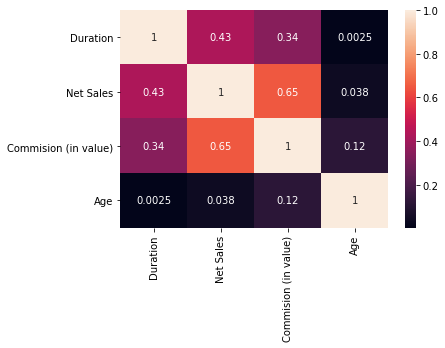

In [45]:
# Check coorelation

sns.heatmap(df_travel_ins.corr(), annot=True)

plt.show()

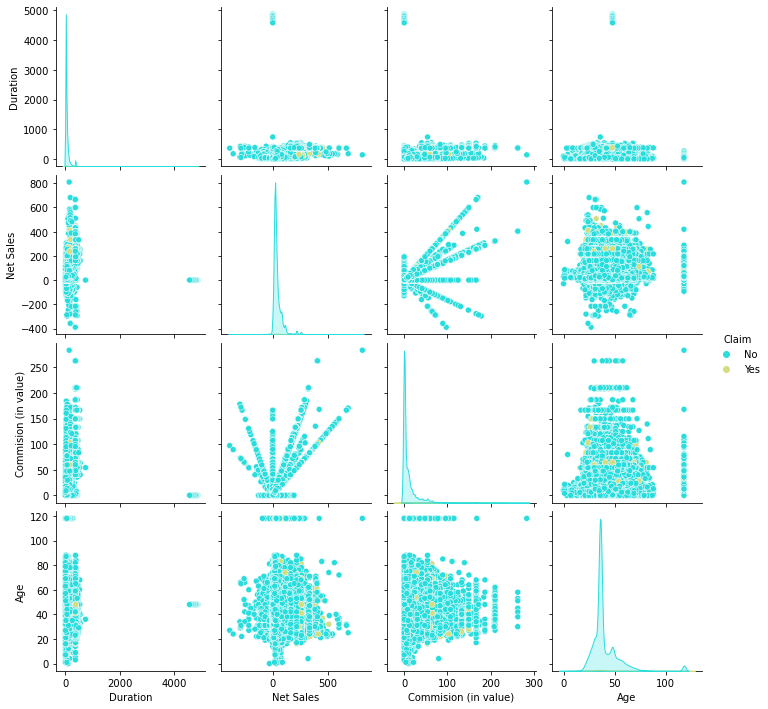

In [46]:
# check on the relation of numerical variable against claim

sns.pairplot(df_travel_ins,hue="Claim",palette='rainbow')
plt.show()

Based on the pairplot above, we can see that the number of claim for Yes is between age 40-60 and duration of the product from min to max have a huge gap. It also show that commission is highly right skewed.

In [47]:
# group column by category

numerical = ["Duration","Net Sales","Commision (in value)","Age"]
categorical = ["Agency","Agency Type","Distribution Channel","Product Name","Claim","Destination","Gender"]
df_travel_ins = df_travel_ins[numerical + categorical]
df_travel_ins.shape  # check on dataframe after grouping

(63326, 11)

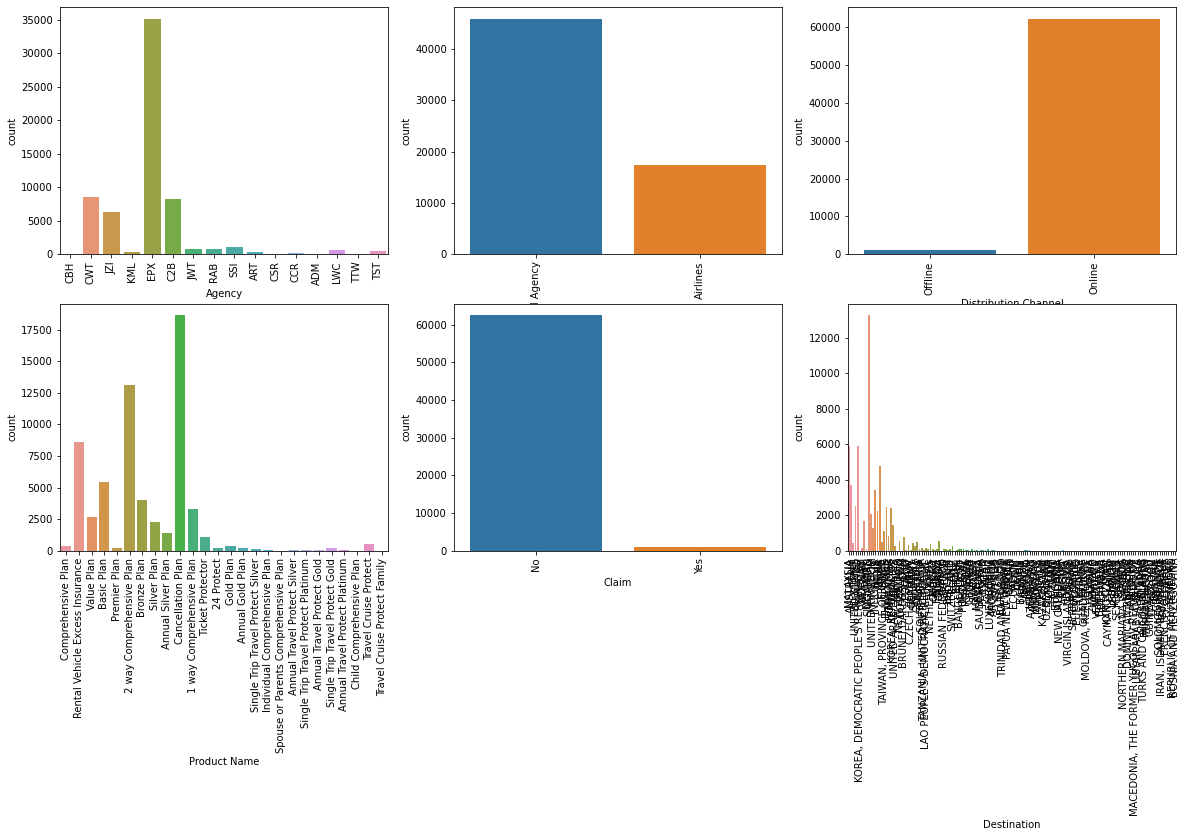

In [48]:
# plot chart for all the categorical variables to explore it from a relatively top view

fig, ax = plt.subplots(2, 3, figsize=(20, 10))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(df_travel_ins[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

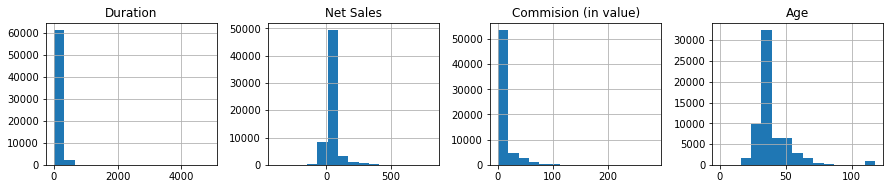

In [49]:
# check distribution for numerical column

df_travel_ins[numerical].hist(bins=15, figsize=(15, 6), layout=(2, 4))
plt.show()

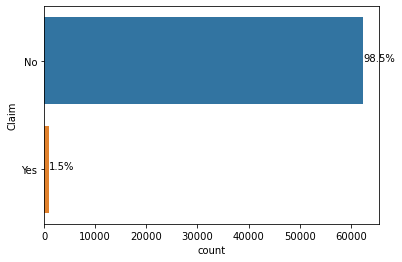

In [50]:
# to check on the percentage of the claim variables
total = len(df_travel_ins["Claim"])
ax = sns.countplot(y="Claim",data = df_travel_ins)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

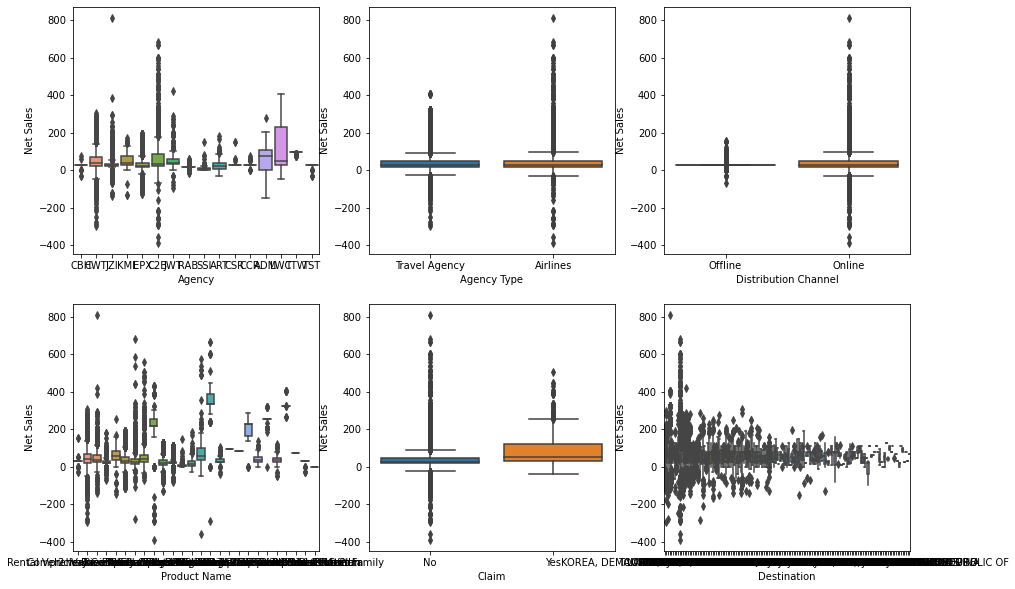

In [51]:
#to check on individual numerical variable how it relate to categorical variable (own checking purposes)
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
for var, subplot in zip(categorical, ax.flatten()):
    sns.boxplot(x=var, y="Net Sales", data=df_travel_ins, ax=subplot)
    label.set_rotation(90)

#### Summary of exploring the dataset and the descriptive analysis of the dataframe:
#### 1) Data findings from top view
 - Online transactions are more than offline, this is due to more convenient to do online and people are more IT savvy now.
 - An imbalanced claim status as there is only 1.5% claimed from the whole dataset.
 - The variances between the most highest frequency and the second highest frequency is huge.
 - Commission and Net Sales have the stronger relationship among the other variables. It could be due to the commission paid out is higher hence adviser will be more driven to close the sales on the particular product.

#### 2) Data need to be clean: 
- column Gender: more than 70% is blank
- column Duration: The graph show it is highly right skewed. Negative values which is not practically possible because a trip must have a duration greater than 0. 
- column Age: It can be random but there is the max age of 118. __[Current oldest people living is 114 years old.]("https://en.wikipedia.org/wiki/Oldest_people")__

### Data cleaning

In [52]:
# Step 1: to check on column of duration data which have negative and zero values

df_duration_negative = df_travel_ins.loc[df_travel_ins["Duration"] < 0]
df_duration_negative

,Duration,Net Sales,Commision (in value),Age,Agency,Agency Type,Distribution Channel,Product Name,Claim,Destination,Gender
14943,-2,22.0,7.7,118,JZI,Airlines,Online,Basic Plan,No,BANGLADESH,M
52587,-1,18.0,6.3,118,JZI,Airlines,Online,Basic Plan,No,MALAYSIA,NaN
52588,-1,18.0,6.3,118,JZI,Airlines,Online,Basic Plan,No,BRUNEI DARUSSALAM,NaN
56668,-1,18.0,6.3,118,JZI,Airlines,Online,Basic Plan,No,INDONESIA,NaN
59528,-1,22.0,7.7,118,JZI,Airlines,Online,Basic Plan,No,CHINA,NaN


In [53]:
df_duration_zero = df_travel_ins.loc[df_travel_ins["Duration"] == 0]
df_duration_zero

,Duration,Net Sales,Commision (in value),Age,Agency,Agency Type,Distribution Channel,Product Name,Claim,Destination,Gender
911,0,15.00,6.00,24,RAB,Airlines,Online,Value Plan,No,BRUNEI DARUSSALAM,F
2515,0,18.00,6.30,26,JZI,Airlines,Online,Basic Plan,No,MYANMAR,F
2868,0,18.00,6.30,42,JZI,Airlines,Online,Basic Plan,No,INDONESIA,M
3282,0,15.00,6.00,38,RAB,Airlines,Online,Value Plan,No,BRUNEI DARUSSALAM,M
3577,0,14.40,4.04,48,SSI,Airlines,Online,Ticket Protector,No,SINGAPORE,NaN
...,...,...,...,...,...,...,...,...,...,...,...
55499,0,3.34,0.94,48,SSI,Airlines,Online,Ticket Protector,No,SINGAPORE,NaN
57114,0,15.00,6.00,33,RAB,Airlines,Online,Value Plan,No,BRUNEI DARUSSALAM,NaN
60746,0,4.88,1.37,48,SSI,Airlines,Online,Ticket Protector,No,SINGAPORE,NaN
63097,0,27.00,6.75,23,C2B,Airlines,Online,Bronze Plan,No,SINGAPORE,M


#### Upon checking, there are 5 records of negative values from column Duration therefore we are removing the instances. However, duration with zero value will be replacing by mean.

In [54]:
# Step 2: drop the instance from the dataframe

df_travel_ins = df_travel_ins[df_travel_ins["Duration"] >= 0]

In [55]:
# Step 3: replacing the duration equals to zero by mean

df_travel_ins.loc[df_travel_ins["Duration"] == 0, "Duration"] = round(df_travel_ins["Duration"].mean(),)

In [56]:
df_travel_ins.describe()  #- to check on duration whether still have negative values

,Duration,Net Sales,Commision (in value),Age
count,63321.000000,63321.000000,63321.000000,63321.000000
mean,49.368266,40.703684,9.810225,39.963819
std,101.783073,48.847203,19.805152,14.000402
min,1.000000,-389.000000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000
50%,22.000000,26.650000,0.000000,36.000000
75%,53.000000,48.000000,11.550000,43.000000
max,4881.000000,810.000000,283.500000,118.000000


In [57]:
# Step 4: to check on how many records is there from the column of Age that more than 100 years old
df_age_100 = df_travel_ins[df_travel_ins["Age"] > 100]
df_age_100

,Duration,Net Sales,Commision (in value),Age,Agency,Agency Type,Distribution Channel,Product Name,Claim,Destination,Gender
10,33,-26.0,9.10,118,JZI,Airlines,Online,Basic Plan,No,"KOREA, DEMOCRATIC PEOPLE'S REPUBLIC OF",NaN
105,11,50.0,20.00,118,JWT,Airlines,Online,Value Plan,No,INDIA,M
220,4,62.0,24.80,118,JWT,Airlines,Online,Value Plan,No,INDIA,F
367,16,50.0,20.00,118,JWT,Airlines,Online,Value Plan,No,INDIA,M
402,5,29.0,9.57,118,CCR,Travel Agency,Offline,Comprehensive Plan,No,MALAYSIA,M
...,...,...,...,...,...,...,...,...,...,...,...
62920,2,31.0,12.40,118,JWT,Airlines,Online,Value Plan,No,INDIA,M
62953,14,59.0,20.65,118,ART,Airlines,Online,Value Plan,No,FRANCE,M
63096,42,61.0,21.35,118,ART,Airlines,Online,Value Plan,No,HONG KONG,M
63182,21,39.0,15.60,118,JWT,Airlines,Online,Value Plan,No,INDIA,F


In [58]:
# Step 5: Exclude age 118

df_travel_ins_118 = df_travel_ins[df_travel_ins["Age"] != 118]

In [59]:
df_travel_ins_118.Age.max() # to check on the max of age

88

In [60]:
# Step 6: to find mean age of each product
age_replace = df_travel_ins_118.groupby("Product Name")[["Age"]].mean().reset_index()

In [61]:
# Step 7: convert age column from float to int
age_replace["Age"] = age_replace["Age"].apply(np.int64)
age_replace

,Product Name,Age
0,1 way Comprehensive Plan,36
1,2 way Comprehensive Plan,37
2,24 Protect,47
3,Annual Gold Plan,44
4,Annual Silver Plan,40
5,Annual Travel Protect Gold,38
6,Annual Travel Protect Platinum,43
7,Annual Travel Protect Silver,40
8,Basic Plan,43
9,Bronze Plan,36


In [62]:
# Step 8: convert the dataframe of the mean age for each product to dictionary
age_replace = dict(zip(age_replace["Product Name"], age_replace["Age"]))
age_replace

{'1 way Comprehensive Plan': 36,
 '2 way Comprehensive Plan': 37,
 '24 Protect': 47,
 'Annual Gold Plan': 44,
 'Annual Silver Plan': 40,
 'Annual Travel Protect Gold': 38,
 'Annual Travel Protect Platinum': 43,
 'Annual Travel Protect Silver': 40,
 'Basic Plan': 43,
 'Bronze Plan': 36,
 'Cancellation Plan': 36,
 'Child Comprehensive Plan': 13,
 'Comprehensive Plan': 54,
 'Gold Plan': 40,
 'Individual Comprehensive Plan': 43,
 'Premier Plan': 42,
 'Rental Vehicle Excess Insurance': 40,
 'Silver Plan': 37,
 'Single Trip Travel Protect Gold': 39,
 'Single Trip Travel Protect Platinum': 41,
 'Single Trip Travel Protect Silver': 39,
 'Spouse or Parents Comprehensive Plan': 44,
 'Ticket Protector': 48,
 'Travel Cruise Protect': 50,
 'Travel Cruise Protect Family': 32,
 'Value Plan': 43}

In [63]:
# Step 9: reset index
df_travel_ins = df_travel_ins.reset_index(drop=True)

In [64]:
# Step 10: to replace age 118 by mean age of each unique product
for idx, age in enumerate(df_travel_ins["Age"]):
    if age == 118:
        product_name = df_travel_ins.loc[idx,"Product Name"]
        df_travel_ins.loc[idx,"Age"] = age_replace[product_name]

In [65]:
df_travel_ins.Age.max() # to check again the max age

88

In [66]:
# Step 11: remove the column of gender since it is more than half of the data are empty 

df_travel_ins.drop("Gender", 1, inplace = True)

In [67]:
# checking on the dataframe after data cleaning

df_travel_ins.shape

(63321, 10)

In [68]:
df_travel_ins.describe()

,Duration,Net Sales,Commision (in value),Age
count,63321.000000,63321.000000,63321.000000,63321.000000
mean,49.368266,40.703684,9.810225,38.809747
std,101.783073,48.847203,19.805152,10.041033
min,1.000000,-389.000000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000
50%,22.000000,26.650000,0.000000,36.000000
75%,53.000000,48.000000,11.550000,43.000000
max,4881.000000,810.000000,283.500000,88.000000


### Data Insights, Findings and Visualization

#### 1. Which product have the most negative net sales transaction and from which agency? 

In [69]:
# check on how many transactions are negative for the total amount od net sales

count_negative = (df_travel_ins["Net Sales"] < 0).sum().sum()
count_negative

678

In [70]:
# create new dataframe for negative transaction

agency_negative = df_travel_ins.loc[df_travel_ins["Net Sales"] < 0]

In [2]:
agency_negative

NameError: name 'agency_negative' is not defined

In [71]:
# find the number of Agency have negative transactions

agency_negative.groupby(["Product Name", "Agency"]).size().sort_values(ascending=False).reset_index(name="count").head(10)

,Product Name,Agency,count
0,Rental Vehicle Excess Insurance,CWT,366
1,Cancellation Plan,EPX,115
2,2 way Comprehensive Plan,EPX,62
3,Basic Plan,JZI,22
4,Annual Silver Plan,C2B,17
5,Bronze Plan,C2B,15
6,1 way Comprehensive Plan,EPX,12
7,Silver Plan,C2B,11
8,Value Plan,JZI,9
9,Premier Plan,ADM,8


##### Insights: Negative net sales may be due to some advisers having higher commission rate with the agency. 
For example, 
premium = 100 dollars
agency earn 50 percent in commission = 50 dollars
and adviser contract with agency earns 80 percent based on premium = 80 dollars.
Hence agency have to pay additional 30 dollars out of pocket to the advisers causing them to have a loss in net sales. 

Agency may adjust the commission paid out based on the commission they received from provider instead of the premium in order to increase net sales.

#### 2. Which product have the highest net sales and highest commission?

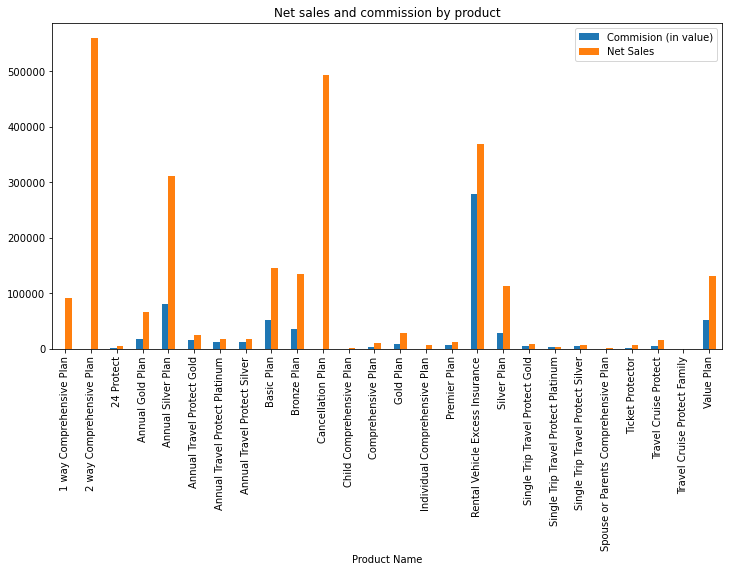

In [72]:
# pivot net sales and commission by product in order to see the variances

product_highest = pd.pivot_table(df_travel_ins, values=["Net Sales", "Commision (in value)"], index=["Product Name"],
                    aggfunc={"Net Sales": np.sum,
                             "Commision (in value)": np.sum})

product_highest.plot(kind="bar",figsize=(12,6))
plt.title("Net sales and commission by product")
plt.show()

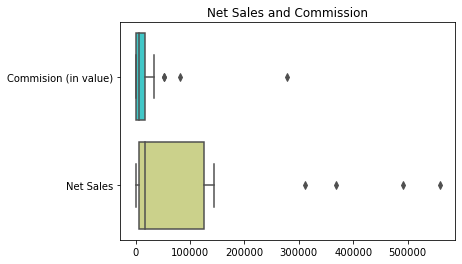

In [73]:
# Comparison of commission paid out and the net sales amount received

sns.boxplot(data=product_highest,palette="rainbow",orient="h")
plt.title("Net Sales and Commission")
plt.show()

From the bar chart, we can see that the top 2 highest sales product without any no commission paid out. It may be due to there is no mark up on the sales price or the company policy that there will be no commission therefore it is cheaper and worth to purchase.<br> Based on commission paid out ranking without comparing the product with no commission paid out, "Rental Vehicle Excess Insurance" has the highest commission and the highest sales. If the commission percentage pay out for the product is higher, adviser may close more sales on the particular for their own earning. Hence the sales will increase accordingly.

#### 3. What are the number of claim per product?

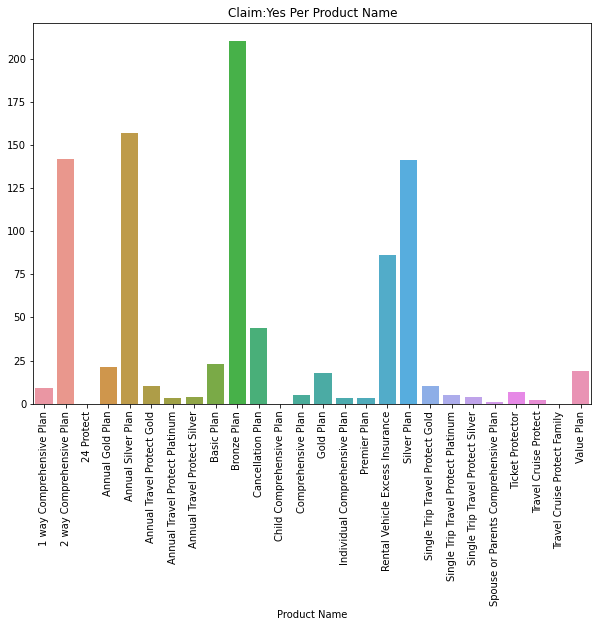

In [74]:
# create a new dataframe by combining product and claim in order to look for the number of claim

product_claim = pd.crosstab(df_travel_ins["Product Name"],df_travel_ins["Claim"],margins=True)
product_claim.drop(index=['All'],inplace=True)

# to show the number of claim in the chart
plt.figure(figsize=(10, 7))
sns.barplot(product_claim.index, product_claim.Yes.values)
plt.xticks(rotation=90)
plt.title("Claim:Yes Per Product Name")
plt.show()

In [75]:
# check some rows of the dataframe
product_claim.head()

Claim,No,Yes,All
Product Name,,,
1 way Comprehensive Plan,3322,9,3331
2 way Comprehensive Plan,13016,142,13158
24 Protect,247,0,247
Annual Gold Plan,173,21,194
Annual Silver Plan,1266,157,1423


In [76]:
# As we are loonking of highest claim hence we resort the dataframe from highest
product_claim = product_claim.sort_values(by=["Yes"],ascending=False).head()
product_claim

Claim,No,Yes,All
Product Name,,,
Bronze Plan,3839,210,4049
Annual Silver Plan,1266,157,1423
2 way Comprehensive Plan,13016,142,13158
Silver Plan,2108,141,2249
Rental Vehicle Excess Insurance,8494,86,8580


Based on the table above, although Bronze Plan is not the most sold product but it is most claimed product. As it is a plan category in the Affordable Care Act marketplace with the least expensive premiums which are more affordable for people who does not use medical services often but they needed the coverage. Here is the link for more reference of the product.
https://www.healthmarkets.com/resources/health-insurance/bronze-plans-all-you-need-to-know/


#### 4. Find out the age group of the claimed product.

In [77]:
# create age group
bins = [0,10,18, 30, 40, 50, 60, 70, 120]
labels = ['0-9','10-17','18-29', '30-39', '40-49', '50-59', '60-69', '70+']
df_travel_ins["Age_Group"] = pd.cut(df_travel_ins.Age, bins, labels = labels,include_lowest = True)

In [78]:
# to create new column to have the claim data replaced by "0" and "1"

df_travel_ins["claimed_status"] = np.where(df_travel_ins["Claim"]!="Yes",0,1)
df_travel_ins

,Duration,Net Sales,Commision (in value),Age,Agency,Agency Type,Distribution Channel,Product Name,Claim,Destination,Age_Group,claimed_status
0,186,-29.0,9.57,81,CBH,Travel Agency,Offline,Comprehensive Plan,No,MALAYSIA,70+,0
1,186,-29.0,9.57,71,CBH,Travel Agency,Offline,Comprehensive Plan,No,MALAYSIA,70+,0
2,65,-49.5,29.70,32,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,AUSTRALIA,30-39,0
3,60,-39.6,23.76,32,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,AUSTRALIA,30-39,0
4,79,-19.8,11.88,41,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,ITALY,40-49,0
...,...,...,...,...,...,...,...,...,...,...,...,...
63316,111,35.0,12.25,31,JZI,Airlines,Online,Basic Plan,No,JAPAN,30-39,0
63317,58,40.0,14.00,40,JZI,Airlines,Online,Basic Plan,No,CHINA,30-39,0
63318,2,18.0,6.30,57,JZI,Airlines,Online,Basic Plan,No,MALAYSIA,50-59,0
63319,3,18.0,6.30,63,JZI,Airlines,Online,Basic Plan,No,VIET NAM,60-69,0


In [79]:
df_travel_ins["claimed_status"].value_counts()  # to check the number replace correctly

0    62394
1      927
Name: claimed_status, dtype: int64

In [80]:
# to filter out only claimed data
df_claimed = df_travel_ins[df_travel_ins["claimed_status"]==1]

In [81]:
df_claimed.head()  # check on the dataframe after removing no claim data

,Duration,Net Sales,Commision (in value),Age,Agency,Agency Type,Distribution Channel,Product Name,Claim,Destination,Age_Group,claimed_status
23,12,94.00,23.50,34,C2B,Airlines,Online,Bronze Plan,Yes,SINGAPORE,30-39,1
248,10,43.55,10.89,45,C2B,Airlines,Online,Silver Plan,Yes,SINGAPORE,40-49,1
313,73,16.00,0.00,36,EPX,Travel Agency,Online,Cancellation Plan,Yes,THAILAND,30-39,1
419,11,62.25,15.56,33,C2B,Airlines,Online,Silver Plan,Yes,SINGAPORE,30-39,1
424,365,187.85,46.96,32,C2B,Airlines,Online,Annual Silver Plan,Yes,SINGAPORE,30-39,1


In [82]:
# to create new dataframe by Age_Group

age_range = df_claimed.groupby("Age_Group").sum().reset_index()

In [83]:
age_range.head(10)

,Age_Group,Duration,Net Sales,Commision (in value),Age,claimed_status
0,0-9,0,0.00,0.00,0,0
1,10-17,583,589.50,150.38,98,6
2,18-29,25221,21714.30,6070.46,6698,251
3,30-39,40483,33944.10,8690.94,14020,398
4,40-49,22023,17690.69,5019.91,6479,143
5,50-59,8829,7944.70,2459.15,4288,78
6,60-69,3907,3944.30,1074.28,2278,35
7,70+,1655,1657.50,494.51,1188,16


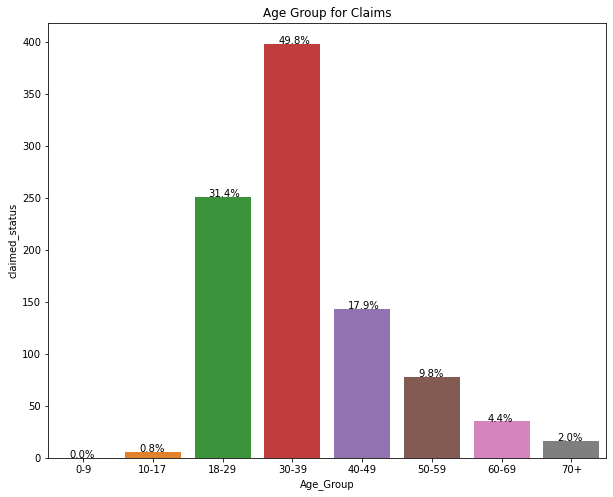

In [84]:
# plot chart to show th difference from each age group 

plt.figure(figsize=(10,8))
ax = sns.barplot(x='Age_Group', y='claimed_status', data=age_range,ci=None)

total = len(age_range["claimed_status"])
for p in ax.patches:
        percentage = '{:.1f}%'.format(p.get_height()/total)
        x = p.get_x() + p.get_width() - 0.6
        y = p.get_y() + p.get_height()/1
        ax.annotate(percentage, (x, y))

plt.title("Age Group for Claims")
plt.show()

#### 5. Which destination have the highest claim and what was the percentage of claim from that destination out of all destination?

In [85]:
# create new dataframe to groupby and show only claimed data by Destination

destination_claimed = df_claimed.groupby("Destination").sum().reset_index()

In [86]:
destination_claimed.sort_values(by=["claimed_status"],ascending=False).head(10)  #sort by number of claimed

,Destination,Duration,Net Sales,Commision (in value),Age,claimed_status
30,SINGAPORE,79619,64578.24,16032.30,21032,562
6,CHINA,3055,2507.80,613.32,1723,46
1,AUSTRALIA,1653,2949.20,1488.87,1475,38
39,UNITED STATES,6381,5963.85,2476.80,1525,37
35,THAILAND,1207,988.20,278.58,1293,34
23,MALAYSIA,601,682.80,269.20,788,23
38,UNITED KINGDOM,738,1138.80,517.63,581,16
20,"KOREA, REPUBLIC OF",941,528.00,76.46,562,15
13,HONG KONG,561,418.00,79.10,632,15
16,INDONESIA,449,395.00,122.72,630,15


In [87]:
# new column for percentage of claimed by Destination

destination_claimed["percentage"] = (destination_claimed["claimed_status"]/destination_claimed["claimed_status"].sum())*100
destination_claimed.reset_index()

,index,Destination,Duration,Net Sales,Commision (in value),Age,claimed_status,percentage
0,0,ARGENTINA,30,79.20,47.52,30,1,0.107875
1,1,AUSTRALIA,1653,2949.20,1488.87,1475,38,4.099245
2,2,BRUNEI DARUSSALAM,41,34.00,6.00,103,2,0.215750
3,3,BULGARIA,75,95.00,0.00,36,1,0.107875
4,4,CAMBODIA,15,20.00,0.00,36,1,0.107875
5,5,CANADA,555,536.70,99.72,222,7,0.755124
6,6,CHINA,3055,2507.80,613.32,1723,46,4.962244
7,7,COSTA RICA,52,112.00,0.00,61,1,0.107875
8,8,CZECH REPUBLIC,51,240.70,77.22,77,2,0.215750
9,9,FINLAND,55,100.00,0.00,36,1,0.107875


In [88]:
# filter only number of claimed more than 10 

destination_claimed = destination_claimed[destination_claimed["claimed_status"]>10]
destination_claimed.head()

,Destination,Duration,Net Sales,Commision (in value),Age,claimed_status,percentage
1,AUSTRALIA,1653,2949.2,1488.87,1475,38,4.099245
6,CHINA,3055,2507.8,613.32,1723,46,4.962244
13,HONG KONG,561,418.0,79.10,632,15,1.618123
16,INDONESIA,449,395.0,122.72,630,15,1.618123
19,JAPAN,1034,637.2,225.58,480,14,1.510248


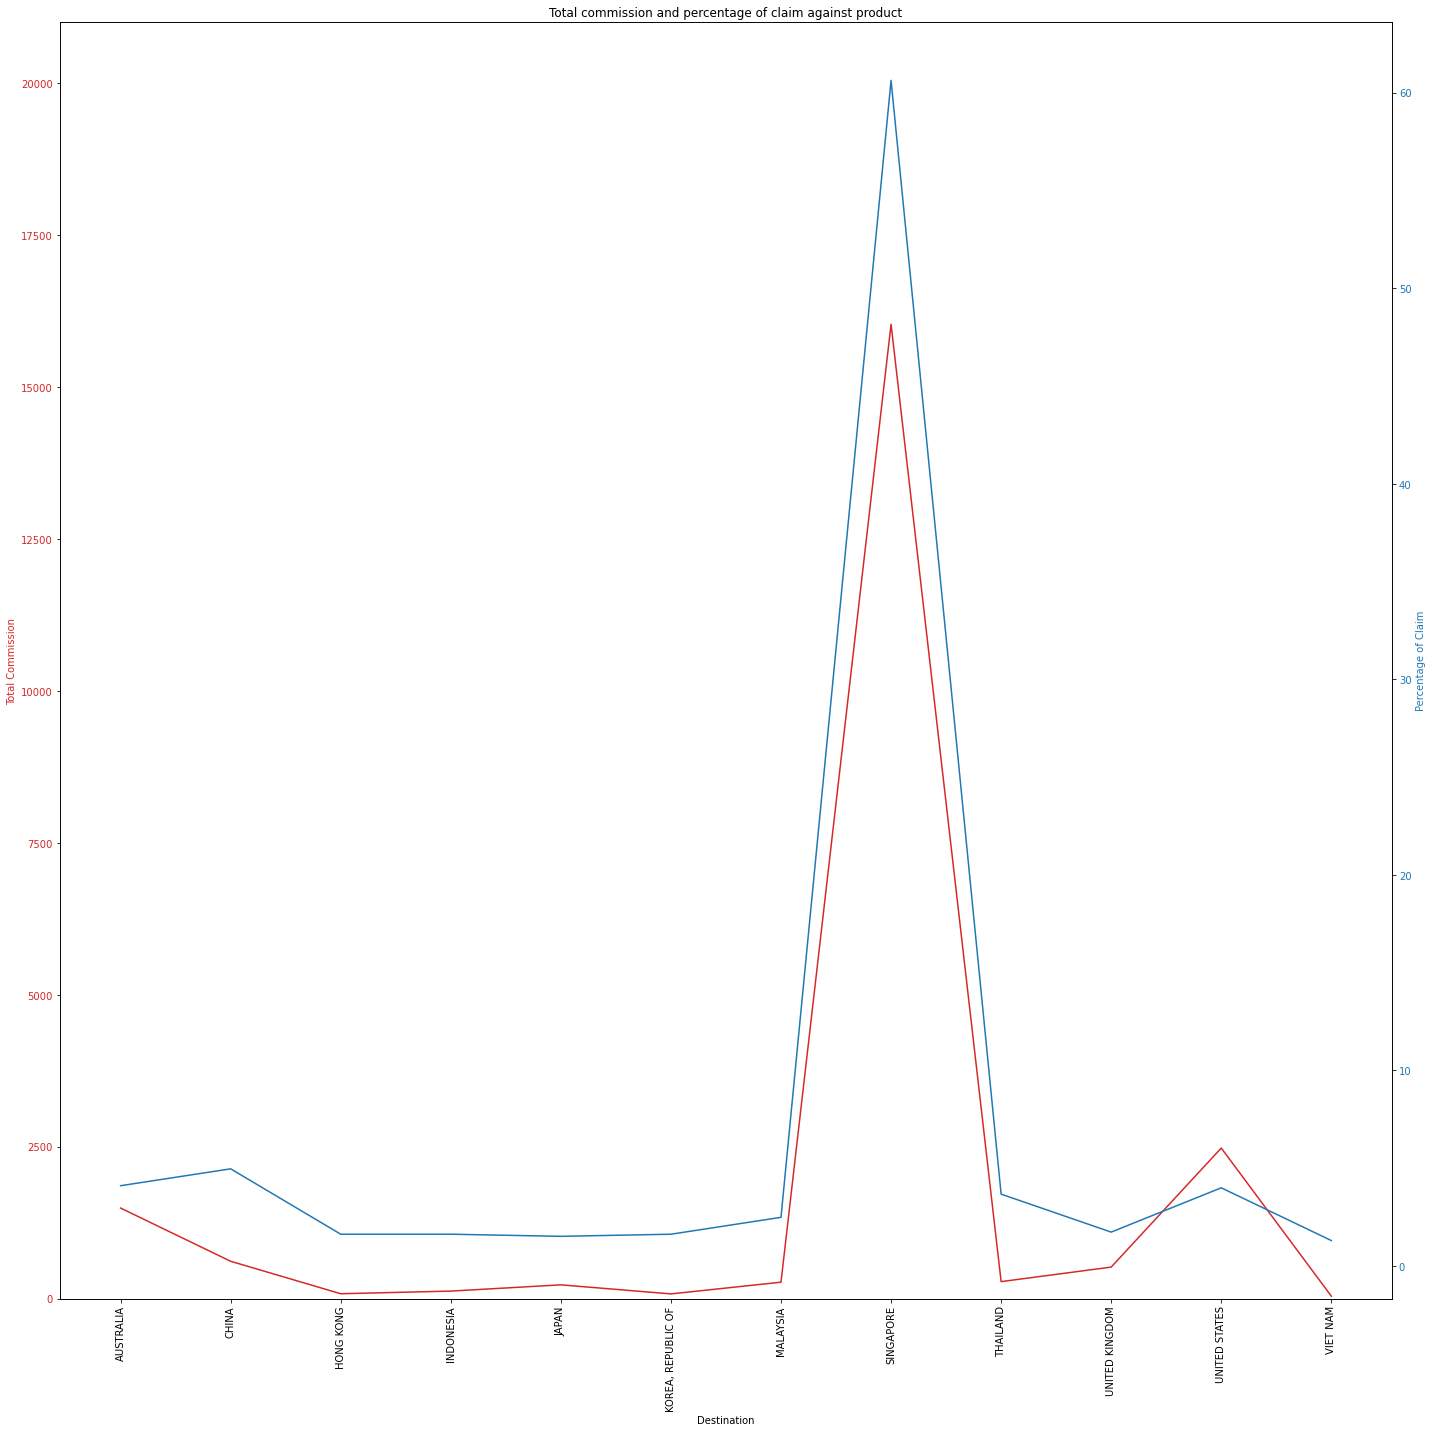

In [89]:
# plot graph for total commission and percentage of claim against product

fig, ax1 = plt.subplots(figsize = (20,20))

color = 'tab:red'
ax1.plot(destination_claimed.Destination,destination_claimed["Commision (in value)"], color=color)
ax1.set_xlabel("Destination")
ax1.set_ylim([0,21000])
for label in ax1.get_xticklabels():
    label.set_rotation(90)
ax1.set_ylabel("Total Commission", color=color)

ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.plot(destination_claimed.Destination, destination_claimed["percentage"], color=color)
ax2.set_ylabel("Percentage of Claim", color=color)  # we already handled the x-label with ax1
ax2.tick_params(axis='y', labelcolor=color)
plt.title("Total commission and percentage of claim against product")

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

#### 6. Find out the duration for product claimed.

In [90]:
# create new dataframe to compare destination against product

top_product = df_travel_ins.groupby(["Product Name","Destination"]).agg({"Destination":"count","Duration":"mean"})

In [91]:
# rename index

top_product.rename({"Destination":"Count"},axis = 1, inplace = True)

In [92]:
# sort value by Duration

top_product.sort_values(by="Duration",ascending=False).head()

Count    Duration
Product Name                 Destination                     
Annual Travel Protect Silver UNITED STATES     51  399.960784
                             INDONESIA          6  388.000000
                             CHINA             29  383.413793
Annual Travel Protect Gold   UNITED STATES     75  381.493333
                             INDONESIA          2  380.500000

In summary, based on the findings of claimed product against age, destination and duration; provider may consider to adjust the premium for the highest claimed below: 

 - Age group from 18-49 especially on the age group 30-39 where the claim rate is almost 50% among all other age group.
 - Singapore have the highest claimed rate which are more than 60% among other countries. 
 - Top 5 average duration from 3 unique countries is more than one year as it is annual coverage. From the destination it may shows that it is a business needs due to current developing countries and it is the lead of the economics currently for manufacturing or technology knowledge. 

This adjustment may be consider in order to remain the revenue of the provider and to prevent the total of claim amount exceeding the budget. Provider may limit the client to renew their policies yearly in order to shorten the duration and avoid if there is any policies criteria change in between.

#### 7. Analyse the relationship between age,claim status,commission and claimed product.

##### 7a. Which agency take more risk selling product to buyers with higher risk profile (i.e. elderly people)?

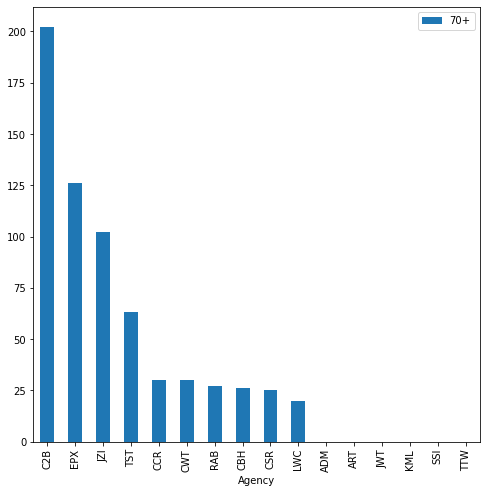

In [126]:
# generate a new dataframe combining agency and age group

risk_age = pd.crosstab(df_travel_ins["Agency"],df_travel_ins["Age_Group"],margins=True)
risk_age.drop(index=['All'],inplace=True)
risk_age.reset_index().sort_values("70+",ascending=False).plot(kind="bar",x="Agency",y="70+",figsize=(8,8))

plt.show()

In [94]:
risk_age.reset_index()

Age_Group,Agency,0-9,10-17,18-29,30-39,40-49,50-59,60-69,70+,All
0,ADM,0,0,79,0,1,2,0,0,82
1,ART,0,0,3,4,314,8,2,0,331
2,C2B,12,57,2920,2617,1240,786,433,202,8267
3,CBH,2,0,17,5,5,12,34,26,101
4,CCR,7,2,30,13,12,60,40,30,194
5,CSR,1,1,16,4,0,14,25,25,86
6,CWT,0,0,1158,3679,1990,1377,346,30,8580
7,EPX,1,1,3392,27487,2171,1400,541,126,35119
8,JWT,0,0,0,0,749,0,0,0,749
9,JZI,1,41,898,1715,1825,1222,520,102,6324


##### 7b. Find which agency has the highest commission and number of claim. 

In [95]:
# create a new dataframe based on agency and product as we are checking the date at agency level

agency_claim = df_travel_ins.groupby(["Agency","Product Name"]).agg({"Commision (in value)":["sum"],
                                                                     "claimed_status":["sum","count"]}).reset_index()
agency_claim.head() #check some rows

Agency      Product Name Commision (in value) claimed_status      
                                            sum            sum count
0    ADM      Premier Plan              1673.14              0    46
1    ADM        Value Plan              1463.76              0    36
2    ART        24 Protect              2102.45              0   247
3    ART        Value Plan              1390.90              1    84
4    C2B  Annual Gold Plan             17250.60             21   194

In [96]:
# to check what column have and flatten a hierarchical index in columns

agency_claim.columns.get_level_values(0)

Index(['Agency', 'Product Name', 'Commision (in value)', 'claimed_status',
       'claimed_status'],
      dtype='object')

In [97]:
# renew index 

replacement_col_list = list(agency_claim.columns.get_level_values(0))
replacement_col_list[2] = "Commission"
replacement_col_list[3] = "Claimed"
replacement_col_list[4] = "Total"

In [98]:
replacement_col_list  # check on the new column

['Agency', 'Product Name', 'Commission', 'Claimed', 'Total']

In [99]:
# replace the new column list

agency_claim.columns = replacement_col_list

In [100]:
agency_claim.head()  #checking

,Agency,Product Name,Commission,Claimed,Total
0,ADM,Premier Plan,1673.14,0,46
1,ADM,Value Plan,1463.76,0,36
2,ART,24 Protect,2102.45,0,247
3,ART,Value Plan,1390.90,1,84
4,C2B,Annual Gold Plan,17250.60,21,194


In [101]:
# sort the dataframe by highest claimed product by agency

agency_claim = agency_claim.sort_values(by = "Claimed",ascending = False)

In [102]:
agency_claim.head() #checking

,Agency,Product Name,Commission,Claimed,Total
6,C2B,Bronze Plan,34824.27,210,4049
5,C2B,Annual Silver Plan,81089.94,157,1423
17,EPX,2 way Comprehensive Plan,0.00,142,13158
8,C2B,Silver Plan,29036.65,141,2249
15,CWT,Rental Vehicle Excess Insurance,277825.68,86,8580


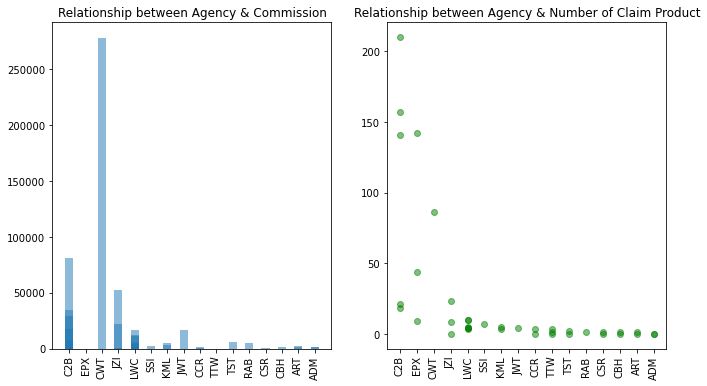

In [103]:
# to plot numerical variable via agency
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(11,6))

axes[0].bar(agency_claim["Agency"], agency_claim["Commission"], align="center", width=0.5, alpha=0.5)
axes[0].set_title("Relationship between Agency & Commission")
for label in axes[0].get_xticklabels():
    label.set_rotation(90)
    
axes[1].scatter(agency_claim["Agency"], agency_claim["Claimed"], color="green", alpha=0.5);
axes[1].set_title("Relationship between Agency & Number of Claim Product");
for label in axes[1].get_xticklabels():
    label.set_rotation(90)

Based on the above findings and graphs, we want to clarify that although CWT has the highest commission and C2B sold the most policies to high risk profiler but it is not the highest claimed product of all agency. Other than that, we want to learn whether specific agency companies lead to an increase numbers of claimed policies.
However, based on the chart above it has shown that since EPX has more sold policies but does not lead to more claimed policies.

#### 8. Does the agency that sell the most volume of insurance equivalent to the top commission earning agency?

In [104]:
# create new dataframe to compare commission against agency

agency_volume = df_travel_ins.groupby(["Agency"]).agg({"Commision (in value)":["sum","count"]}).reset_index()

In [105]:
agency_volume.columns.get_level_values(0)  # to check on the column of dataframe

Index(['Agency', 'Commision (in value)', 'Commision (in value)'], dtype='object')

In [106]:
# to renew the column
replacement_col_list6 = list(agency_volume.columns.get_level_values(0))
replacement_col_list6[1] = "Sum of Commission"
replacement_col_list6[2] = "Total"

In [107]:
replacement_col_list6  # check on the new column list

['Agency', 'Sum of Commission', 'Total']

In [108]:
agency_volume.columns = replacement_col_list6  # to change the column name

In [109]:
# to sort by commission in order to see the largest amount

agency_volume = agency_volume.sort_values(by = "Sum of Commission",ascending = False)

In [110]:
agency_volume     # check on the dataframe

,Agency,Sum of Commission,Total
6,CWT,277825.68,8580
2,C2B,169747.34,8267
9,JZI,74436.95,6324
11,LWC,51169.13,689
8,JWT,16208.40,749
10,KML,8550.38,392
14,TST,5556.25,528
12,RAB,5239.20,725
1,ART,3493.35,331
0,ADM,3136.90,82


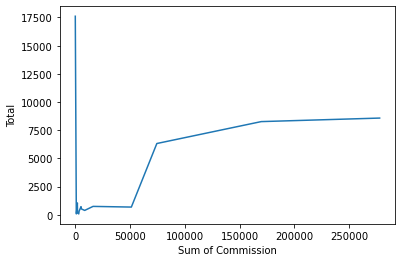

In [111]:
# to plot graph for visualization

sns.lineplot(x="Sum of Commission",y="Total",data=agency_volume, ci = None)
plt.show()

It is proven that agency that have the highest commission does not equivalent to the highest volume of policies sold. Some product may have high percentage of commission paid out per product due to provider or agency itself might have make some adjustment based on the product campaign for a certain period or the premium and requirement of the product is different from the basic coverage. Hence the commission will be in special rate.

#### 9. What is the percentage of net sales from agency type and distribution channel? 

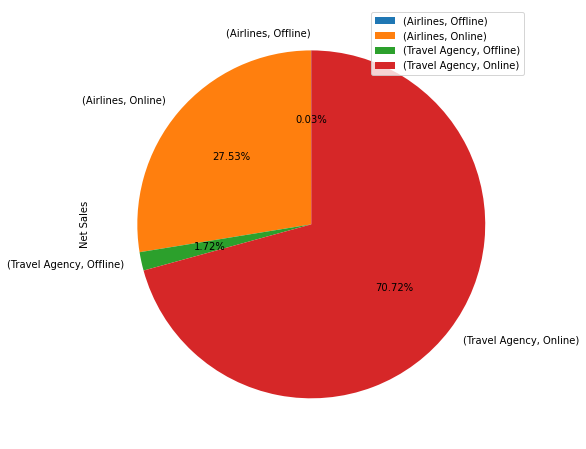

In [112]:
# to check on the percentage of sales from which agency type and distribution channel

agency_type = df_travel_ins.groupby(["Agency Type","Distribution Channel"]).count()
agency_type.plot(kind="pie",y="Net Sales",startangle=90, figsize=(8,8),autopct='%1.2f%%')
plt.show()

Based on the pie chart, we can have a conclusion that people tend to purchase through travel agency hence most product were sold through travel agency as there are more options to their needs and it may be in a package with the trips. It is more convenient to go through a third party for the purchase of insurance as they have professional advice and select product that fulfill the client needs. Client also can have various product from different provider through one channel.

#### 10. How much is total commission received by agency among distribution channel?

In [113]:
# create new dataframe to find commission based on distribution channel and agency

distribution_volume = df_travel_ins.groupby(["Distribution Channel","Agency"]).agg({"Commision (in value)":["sum","count"]}).reset_index()
distribution_volume.head() #checking purposes

Distribution Channel Agency Commision (in value)      
                                               sum count
0              Offline    ART                28.00     2
1              Offline    CBH              1013.10   101
2              Offline    CCR              2000.79   194
3              Offline    CSR               930.93    86
4              Offline    CWT               291.06     7

In [114]:
# to check on the column of dataframe
distribution_volume.columns.get_level_values(0)

Index(['Distribution Channel', 'Agency', 'Commision (in value)',
       'Commision (in value)'],
      dtype='object')

In [115]:
# rename for index

replacement_col_list5 = list(distribution_volume.columns.get_level_values(0))
replacement_col_list5[2] = "sum_commission"
replacement_col_list5[3] = "count_commission"

In [116]:
replacement_col_list5  # to check on the new column 

['Distribution Channel', 'Agency', 'sum_commission', 'count_commission']

In [117]:
# to replace the column name

distribution_volume.columns = replacement_col_list5

In [118]:
distribution_volume.sort_values(by="sum_commission",ascending=False).head()  #checking 

,Distribution Channel,Agency,sum_commission,count_commission
15,Online,CWT,277534.62,8573
14,Online,C2B,169747.34,8267
18,Online,JZI,74337.20,6319
20,Online,LWC,51169.13,689
17,Online,JWT,16208.40,749


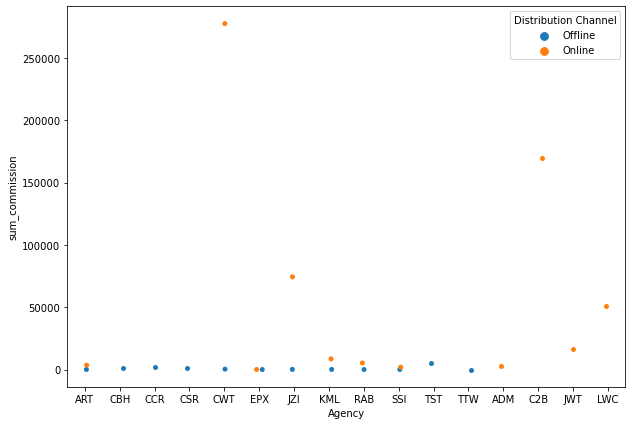

In [119]:
# plot chart 

plt.figure(figsize = (10,7))
sns.stripplot(x="Agency",y="sum_commission",data=distribution_volume, hue="Distribution Channel")
plt.show()

From the previous pie chart on Q9, we know that travel agency has the most sales and with the graph above, we can conclude that through online distribution channel, travel agency earns the most commission as well. Since their product varies and more buyers tend to prefer to do it online with just a mobile device, it is able to save buyers time and is more efficient compare to offline.

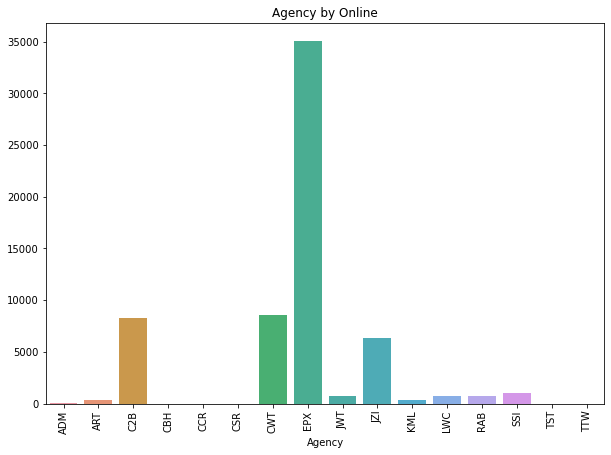

In [120]:
# to find the highest claimed from online distribution channel
 
product_claim = pd.crosstab(df_travel_ins["Agency"],df_travel_ins["Distribution Channel"],margins=True)
product_claim.drop(index=['All'],inplace=True)

plt.figure(figsize=(10, 7))
sns.barplot(product_claim.index, product_claim.Online.values)
plt.xticks(rotation=90)
plt.title("Agency by Online")
plt.show()


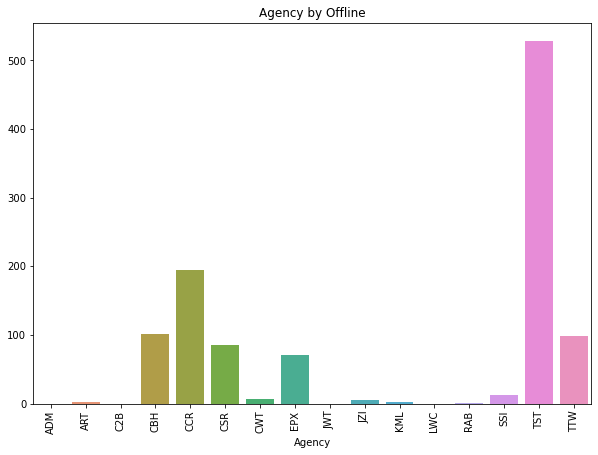

In [121]:
# to find the highest claimed from offline distribution channel
 
product_claim = pd.crosstab(df_travel_ins["Agency"],df_travel_ins["Distribution Channel"],margins=True)
product_claim.drop(index=['All'],inplace=True)

plt.figure(figsize=(10, 7))
sns.barplot(product_claim.index, product_claim.Offline.values)
plt.xticks(rotation=90)
plt.title("Agency by Offline")
plt.show()

From the bar chart we can conclude that not all agency selling product offline as some of the agency might be able to liaise online with buyers through technology nowadays and this helps to save their cost on rental and administration cost.

### Summary of the insight/findings and recommendations: 

In general, travel insurance premium is mostly based on destination and duration for the coverage.

The largest share of net sales for travel agency shows that they have a huge customer base when compared to airline agencies. Airline agencies should focus more on acquiring customers who opt for airline insurance together with a package at a lower price to attract the customer to purchase from them.

Provider may consider to drop their low performing products which generates lesser revenue to them or they need to revisit their product portfolio to do some needful changes so that it can attract more customers based on the chart on net sales and commissions.

Besides that, focusing more on online mode of product sales show that travel agency are able to sell more insurance plans to the customers. We can say this for sure because the same has been proved by the airline agencies(refer to Q9 distribution type sales diagram(Airlines and Travel)). Therefore, airline agencies should invest on how to increase their sales via online mode(e-commerce).

Lastly, instead of putting additional resources on acquiring customers for the countries that have the most sales, the agencies should intelligently divide the resources in proportion to the revenue that they generate from different countries.

